In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('jira_t_Copy.csv')

In [88]:
df.head(5)

,clean_summary,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline,text_length
0,implement task dashboard,bug,progress,backendapi,software,jatin raj,internal devops automation tool,low,done,brian kim,tow days,24
1,add dark mode feature,task,NaN,web portal,software,jatin raj,building ai model task sorting,medium,done,shraddha,five days,21
2,design splash screen,bug,NaN,mobileapp,software,pooja agarwal,portal customer access,low,progress,alice johnson,tow days,20
3,design splash screen,story,NaN,aiengine,software,pooja agarwal,building ai model task sorting,critical,progress,pooja agarwal,for days,20
4,revamp login ui,bug,NaN,devopstooling,software,pooja agarwal,building ai model task sorting,critical,progress,alice johnson,one days,15



# New Section

In [89]:
df.columns

Index(['clean_summary', 'clean_issue_type', 'clean_status',
       'clean_project_name', 'clean_project_type', 'clean_project_lead',
       'clean_project_description', 'clean_priority', 'clean_resolution',
       'clean_task_assignee', 'task_deadline', 'text_length'],
      dtype='object')

In [90]:
df.isnull().sum()

clean_summary                  1
clean_issue_type               0
clean_status                 543
clean_project_name             0
clean_project_type             0
clean_project_lead             0
clean_project_description      0
clean_priority                 0
clean_resolution               0
clean_task_assignee            0
task_deadline                  0
text_length                    0
dtype: int64

In [91]:
df.ffill(inplace=True)

In [92]:
df.isnull().sum()

clean_summary                0
clean_issue_type             0
clean_status                 0
clean_project_name           0
clean_project_type           0
clean_project_lead           0
clean_project_description    0
clean_priority               0
clean_resolution             0
clean_task_assignee          0
task_deadline                0
text_length                  0
dtype: int64

In [93]:
df.dtypes

clean_summary                object
clean_issue_type             object
clean_status                 object
clean_project_name           object
clean_project_type           object
clean_project_lead           object
clean_project_description    object
clean_priority               object
clean_resolution             object
clean_task_assignee          object
task_deadline                object
text_length                   int64
dtype: object

In [94]:
df.describe(include="all")

,clean_summary,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline,text_length
count,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234.000000
unique,247,3,3,6,6,6,6,4,4,10,4,NaN
top,automate report generatio,story,progress,web portal,software,alice johnson,portal customer access,medium,progress,alice johnson,five days,NaN
freq,89,500,581,325,659,342,337,334,325,207,317,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.939222
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.430121
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000


In [95]:
for col in df.columns:
    print(col)

clean_summary
clean_issue_type
clean_status
clean_project_name
clean_project_type
clean_project_lead
clean_project_description
clean_priority
clean_resolution
clean_task_assignee
task_deadline
text_length


In [96]:
# text_cols = ['Summary', 'Status','Priority', 'Resolution','Task_Started','Task_Deadline'],
text_cols = ['clean_summary', 'clean_status','clean_priority', 'clean_resolution'],
for col in text_cols:
  df[col] = df[col].astype(str)

In [97]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [98]:
df.head(2)

,clean_summary,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline,text_length
0,implement task dashboard,bug,progress,backendapi,software,jatin raj,internal devops automation tool,low,done,brian kim,tow days,24
1,add dark mode feature,task,progress,web portal,software,jatin raj,building ai model task sorting,medium,done,shraddha,five days,21


In [99]:
# !pip install nltk pandas re
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string # Import the string modul

In [100]:
# Ensure necessary NLTK data is downloaded, including punkt_tab
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91999\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91999\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91999\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91999\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [101]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [102]:
def clean_text(text):
    # Ensure input is a string
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove urls
    text = re.sub(r'\d+', '', text)  # remove digits
    # Use string.punctuation directly
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)


In [103]:
df.head()

,clean_summary,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline,text_length
0,implement task dashboard,bug,progress,backendapi,software,jatin raj,internal devops automation tool,low,done,brian kim,tow days,24
1,add dark mode feature,task,progress,web portal,software,jatin raj,building ai model task sorting,medium,done,shraddha,five days,21
2,design splash screen,bug,progress,mobileapp,software,pooja agarwal,portal customer access,low,progress,alice johnson,tow days,20
3,design splash screen,story,progress,aiengine,software,pooja agarwal,building ai model task sorting,critical,progress,pooja agarwal,for days,20
4,revamp login ui,bug,progress,devopstooling,software,pooja agarwal,building ai model task sorting,critical,progress,alice johnson,one days,15


In [104]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Shape: (1234, 12)
Columns: ['clean_summary', 'clean_issue_type', 'clean_status', 'clean_project_name', 'clean_project_type', 'clean_project_lead', 'clean_project_description', 'clean_priority', 'clean_resolution', 'clean_task_assignee', 'task_deadline', 'text_length']

Missing Values:
 clean_summary                0
clean_issue_type             0
clean_status                 0
clean_project_name           0
clean_project_type           0
clean_project_lead           0
clean_project_description    0
clean_priority               0
clean_resolution             0
clean_task_assignee          0
task_deadline                0
text_length                  0
dtype: int64

Data Types:
 clean_summary                object
clean_issue_type             object
clean_status                 object
clean_project_name           object
clean_project_type           object
clean_project_lead           object
clean_project_description    object
clean_priority               object
clean_resolution          

In [105]:
# !pip install matplotlib seaborn

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
print("clean_issue_type" in df.columns)
print(df['clean_issue_type'].head())  # Show the first 5 rows
print(df['clean_issue_type'].tail())  # Show the first 5 rows
print(df[df['clean_issue_type'].isnull()])
print(df['clean_issue_type'].value_counts())


True
0      bug
1     task
2      bug
3    story
4      bug
Name: clean_issue_type, dtype: object
1229    story
1230    story
1231      bug
1232      bug
1233     task
Name: clean_issue_type, dtype: object
Empty DataFrame
Columns: [clean_summary, clean_issue_type, clean_status, clean_project_name, clean_project_type, clean_project_lead, clean_project_description, clean_priority, clean_resolution, clean_task_assignee, task_deadline, text_length]
Index: []
clean_issue_type
story    500
bug      396
task     338
Name: count, dtype: int64


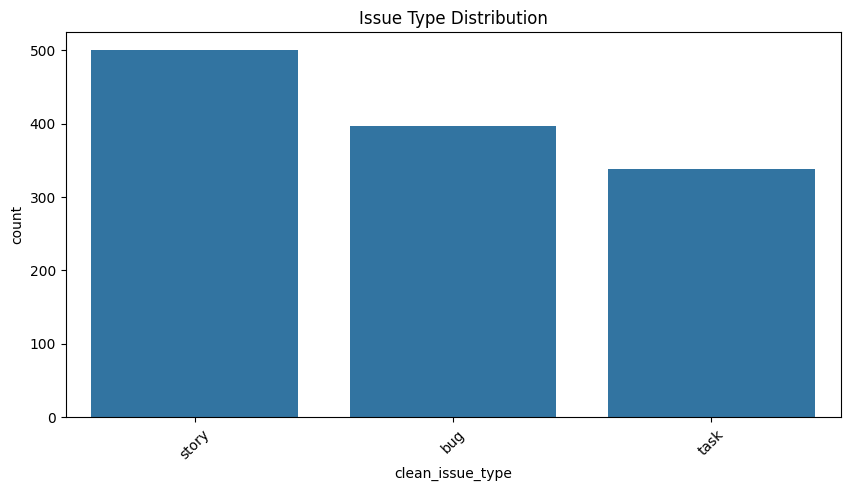

In [108]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='clean_issue_type', order=df['clean_issue_type'].value_counts().index)
plt.title("Issue Type Distribution")
plt.xticks(rotation=45)
plt.show()

In [109]:
df.columns

Index(['clean_summary', 'clean_issue_type', 'clean_status',
       'clean_project_name', 'clean_project_type', 'clean_project_lead',
       'clean_project_description', 'clean_priority', 'clean_resolution',
       'clean_task_assignee', 'task_deadline', 'text_length'],
      dtype='object')

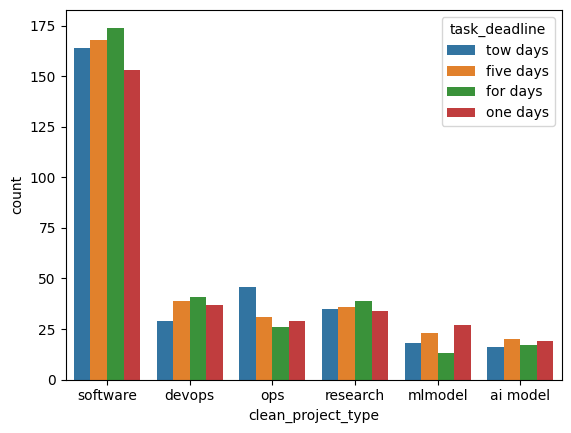

In [110]:
sns.countplot(data=df, x='clean_project_type', hue='task_deadline')
plt.show()

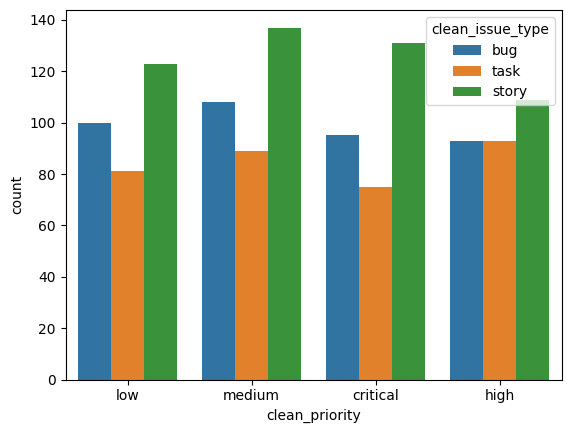

In [111]:
sns.countplot(data=df, x='clean_priority', hue='clean_issue_type')
plt.show()

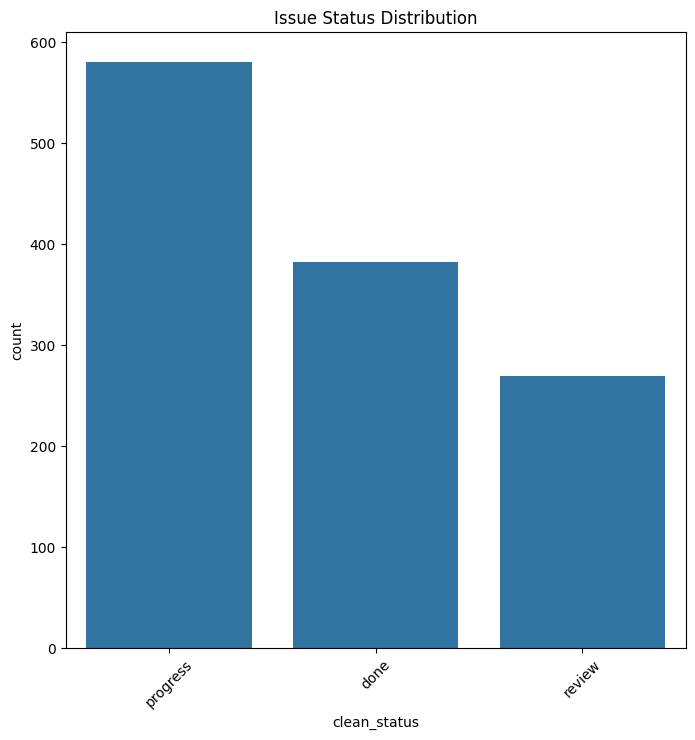

In [112]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='clean_status', order=df['clean_status'].value_counts().index)
plt.title("Issue Status Distribution")
plt.xticks(rotation=45)
plt.show()


<Axes: >

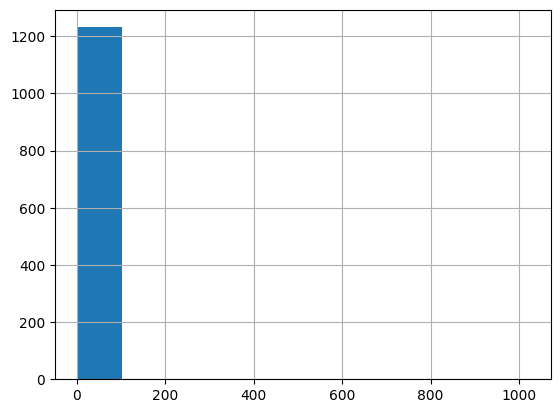

In [113]:
df['text_length'] = df['clean_summary'].apply(len)
df['text_length'].hist()


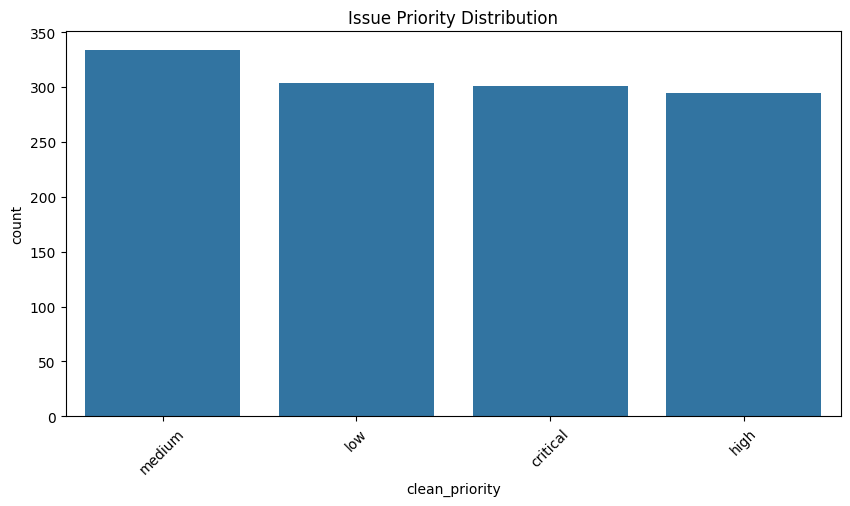

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='clean_priority', order=df['clean_priority'].value_counts().index)
plt.title("Issue Priority Distribution")
plt.xticks(rotation=45)
plt.show()

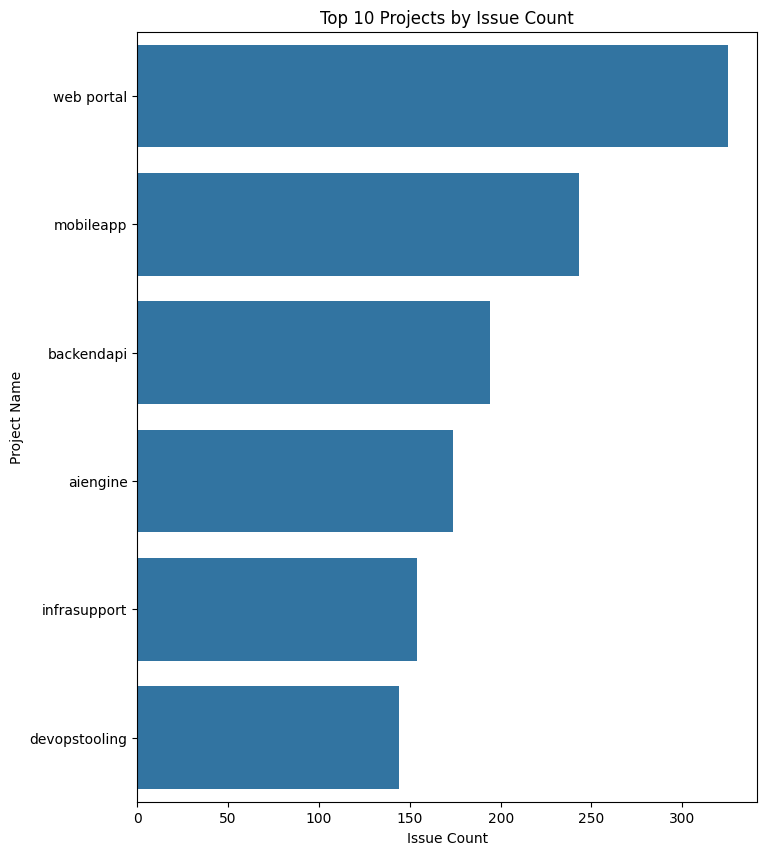

In [115]:
top_projects = df['clean_project_name'].value_counts().head(10)

plt.figure(figsize=(8, 10))
sns.barplot(x=top_projects.values, y=top_projects.index)
plt.title("Top 10 Projects by Issue Count")
plt.xlabel("Issue Count")
plt.ylabel("Project Name")
plt.show()


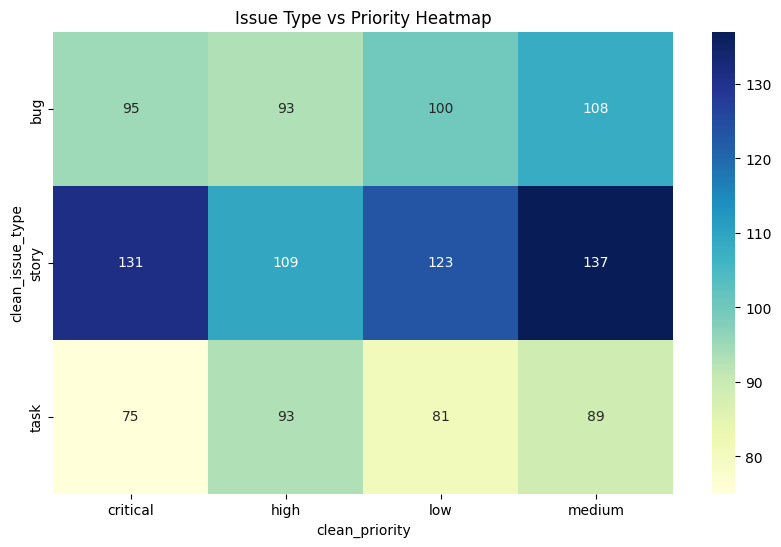

In [116]:
pivot = pd.crosstab(df['clean_issue_type'], df['clean_priority'])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Issue Type vs Priority Heatmap")
plt.show()


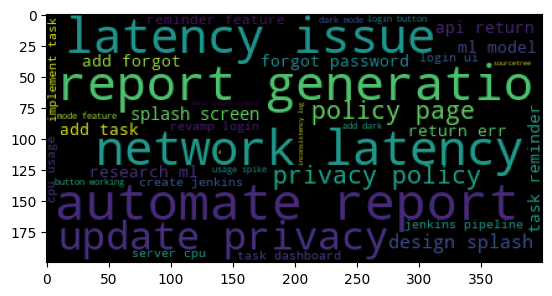

In [117]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(df['clean_summary']))
plt.imshow(wordcloud)


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd # Import pandas

def get_top_n_words(corpus, n=None):
    # Ensure corpus is a Series and drop any NaN values before processing
    if isinstance(corpus, pd.Series):
        corpus = corpus.dropna()
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Example: For 'bug' issues
bug_summary = df[df['clean_issue_type'] == 'bug']['clean_summary']
top_bug_words = get_top_n_words(bug_summary, n=10)

print("Top words in 'Bug' issues:")
for word, freq in top_bug_words:
    print(f"{word}: {freq}")

Top words in 'Bug' issues:
add: 58
login: 45
task: 39
feature: 36
network: 30
latency: 30
issue: 30
automate: 29
report: 29
generatio: 29


In [119]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, hamming_loss # Keep hamming_loss for appropriate targets
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

In [120]:
df.head(2)

,clean_summary,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline,text_length
0,implement task dashboard,bug,progress,backendapi,software,jatin raj,internal devops automation tool,low,done,brian kim,tow days,24
1,add dark mode feature,task,progress,web portal,software,jatin raj,building ai model task sorting,medium,done,shraddha,five days,21


In [121]:
X = df['clean_summary']
# Y = df['clean_issue_type', 'clean_status','clean_project_name', 'clean_project_type', 'clean_priority','clean_resolution']

In [122]:
Y = df[['clean_issue_type', 'clean_status','clean_project_name', 'clean_project_type','clean_project_lead','clean_project_description', 'clean_priority','clean_resolution','clean_task_assignee','task_deadline']]

In [123]:
Y

,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline
0,bug,progress,backendapi,software,jatin raj,internal devops automation tool,low,done,brian kim,tow days
1,task,progress,web portal,software,jatin raj,building ai model task sorting,medium,done,shraddha,five days
2,bug,progress,mobileapp,software,pooja agarwal,portal customer access,low,progress,alice johnson,tow days
3,story,progress,aiengine,software,pooja agarwal,building ai model task sorting,critical,progress,pooja agarwal,for days
4,bug,progress,devopstooling,software,pooja agarwal,building ai model task sorting,critical,progress,alice johnson,one days
...,...,...,...,...,...,...,...,...,...,...
1229,story,done,backendapi,mlmodel,brian kim,internal devops automation tool,critical,unresolved,brian kim,tow days
1230,story,review,aiengine,software,alice johnson,mobile app task management,critical,fixed,brian kim,for days
1231,bug,review,backendapi,mlmodel,alice johnson,internal devops automation tool,critical,done,brian kim,for days
1232,bug,review,devopstooling,devops,reema desai,mobile app task management,low,progress,nikhil singh,five days


In [124]:
label_encoders = {}
for col in Y.columns:
    if Y[col].dtype == 'object':
        le = LabelEncoder()
        # Handle potential NaN values before encoding
        # Convert to string first to ensure fillna works consistently
        Y[col] = Y[col].astype(str).fillna('Unknown')
        Y[col] = le.fit_transform(Y[col])
        label_encoders[col] = le # Store the fitted encoder

C:\Users\91999\AppData\Local\Temp\ipykernel_26456\755280288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = Y[col].astype(str).fillna('Unknown')
C:\Users\91999\AppData\Local\Temp\ipykernel_26456\755280288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = le.fit_transform(Y[col])
C:\Users\91999\AppData\Local\Temp\ipykernel_26456\755280288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [125]:
Y

,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline
0,0,1,1,5,2,2,2,0,2,3
1,2,1,5,5,2,0,3,0,9,0
2,0,1,4,5,4,4,2,2,1,3
3,1,1,0,5,4,0,0,2,6,1
4,0,1,2,5,4,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1229,1,0,1,2,1,2,0,3,2,3
1230,1,2,0,5,0,3,0,1,2,1
1231,0,2,1,2,0,2,0,0,2,1
1232,0,2,2,1,5,3,2,2,5,0


In [126]:
# # 🔹 Step 1: Convert datetime to categorical bins
# def process_dates(df):
#     df['task_started'] = pd.to_datetime(df['task_started'], errors='coerce')
#     df['task_deadline'] = pd.to_datetime(df['task_deadline'], errors='coerce')

#     df['start_dayofweek'] = df['task_started'].dt.dayofweek
#     df['start_hour'] = df['task_started'].dt.hour
#     df['deadline_in_days'] = (df['task_deadline'] - df['task_started']).dt.days

#     return df[['start_dayofweek', 'start_hour', 'deadline_in_days']]

In [46]:
# 🔹 Assume you already have X (text) and Y (multi-output dataframe)
# If task_started and task_deadline are part of Y, extract and process them first
# date_features = process_dates(Y.copy())

In [47]:
# Remove original datetime columns from target
# Y = Y.drop(columns=['task_started', 'task_deadline'])

In [48]:
# date_features

In [51]:
# Example: Merge on index
# data_dff = pd.merge(Y, date_features, left_index=True, right_index=True, how='inner')

In [52]:
# data_dff

In [127]:
Y

,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline
0,0,1,1,5,2,2,2,0,2,3
1,2,1,5,5,2,0,3,0,9,0
2,0,1,4,5,4,4,2,2,1,3
3,1,1,0,5,4,0,0,2,6,1
4,0,1,2,5,4,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1229,1,0,1,2,1,2,0,3,2,3
1230,1,2,0,5,0,3,0,1,2,1
1231,0,2,1,2,0,2,0,0,2,1
1232,0,2,2,1,5,3,2,2,5,0


In [128]:
X

0                                implement task dashboard
1                                   add dark mode feature
2                                    design splash screen
3                                    design splash screen
4                                         revamp login ui
                              ...                        
1229                        oauth fails unable get secret
1230              sourcetree window app crash upon launch
1231       launch ssh agent fails code system git openssh
1232                                     case sensitivity
1233    sourcetree error many invalid password attempt...
Name: clean_summary, Length: 1234, dtype: object

In [129]:
Y

,clean_issue_type,clean_status,clean_project_name,clean_project_type,clean_project_lead,clean_project_description,clean_priority,clean_resolution,clean_task_assignee,task_deadline
0,0,1,1,5,2,2,2,0,2,3
1,2,1,5,5,2,0,3,0,9,0
2,0,1,4,5,4,4,2,2,1,3
3,1,1,0,5,4,0,0,2,6,1
4,0,1,2,5,4,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1229,1,0,1,2,1,2,0,3,2,3
1230,1,2,0,5,0,3,0,1,2,1
1231,0,2,1,2,0,2,0,0,2,1
1232,0,2,2,1,5,3,2,2,5,0


In [130]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

In [131]:
# Train/Test split (optional)
X_train, X_test, Y_train, Y_test = train_test_split(X_vect, Y, test_size=0.2, random_state=42)


In [132]:
# Multi-output classification with Logistic Regression
base_model = LogisticRegression(max_iter=1000)
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [133]:
# Save model and vectorizer
joblib.dump(multi_model, 'model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_cols, 'multi_output_labels.pkl')

print("✅ Model, vectorizer, and label list saved successfully!")

✅ Model, vectorizer, and label list saved successfully!


In [69]:
import pandas as pd
import re
import nltk
import joblib

In [70]:
#save everything
joblib.dump(model, 'model.pkl')

['model.pkl']

In [71]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [72]:
joblib.dump(Y.columns.to_list(), 'multi_output_labels.pkl')

['multi_output_labels.pkl']

In [914]:
# df

In [915]:
# Create a list of column names you want to select for X
# feature_columns = ['clean_summary', 'clean_issue_type', 'clean_status', 'clean_project_name', 'clean_project_type', 'clean_priority']

# Select the columns from the DataFrame using the list
# X = df[feature_columns]

In [916]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

In [917]:
# # Text Vectorizer for 'Summary'
# tfidf = TfidfVectorizer(max_features=300)

In [918]:
# # LabelEncoders for categorical features
# categorical_features = ['clean_issue_type', 'clean_status', 'clean_project_name', 'clean_project_type', 'clean_priority']
# label_encoders = {col: LabelEncoder() for col in categorical_features}
# for col in categorical_features:
#     X[col] = label_encoders[col].fit_transform(X[col])


In [919]:
# # Transform 'Summary' to TF-IDF matrix
# X_summary_tfidf = tfidf.fit_transform(X["clean_summary"])

In [920]:
# # Concatenate TF-IDF with other numerical features
# X_cat = X[categorical_features].values

In [921]:
# X_cat

In [922]:
# X_summary_tfidf

In [923]:
# import scipy
# X_final = scipy.sparse.hstack([X_summary_tfidf, X_cat])

In [924]:
# # Split data into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [925]:
# # 🎯 Train a model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

In [926]:
# # 📈 Evaluate
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [927]:
# from sklearn.metrics import accuracy_score, classification_report


In [928]:
# # ✅ Accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")

# # 📋 Detailed Report
# print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

In [929]:
# import numpy as np

In [930]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


In [931]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5]
# }

# grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)
# print("Best Score:", grid.best_score_)
